In [1]:
from anndata import AnnData
import scanpy as sc
import squidpy as sq
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
adata = sc.read_h5ad("/home/levinsj/spatial/adata/7_13_23_slide0_annotated.h5ad")

In [3]:
adata.obs["sample"].value_counts()

sample
HK3039    283641
HK2844    274960
Name: count, dtype: int64

# Calculate post filter counts per FOV

In [4]:
fov_mean = []
fov_id = []

for i in adata.obs["fov"].unique():
    fov_mean.append(np.mean(adata[adata.obs["fov"] == i].obs["nCount_RNA"]))
    fov_id.append(i)

fov_dict = {k: v for k, v in zip(fov_id, fov_mean)}

adata.obs["meanCounts_perFOV"] = adata.obs['fov'].map(fov_dict)

# Plot QC metrics in spatial terms

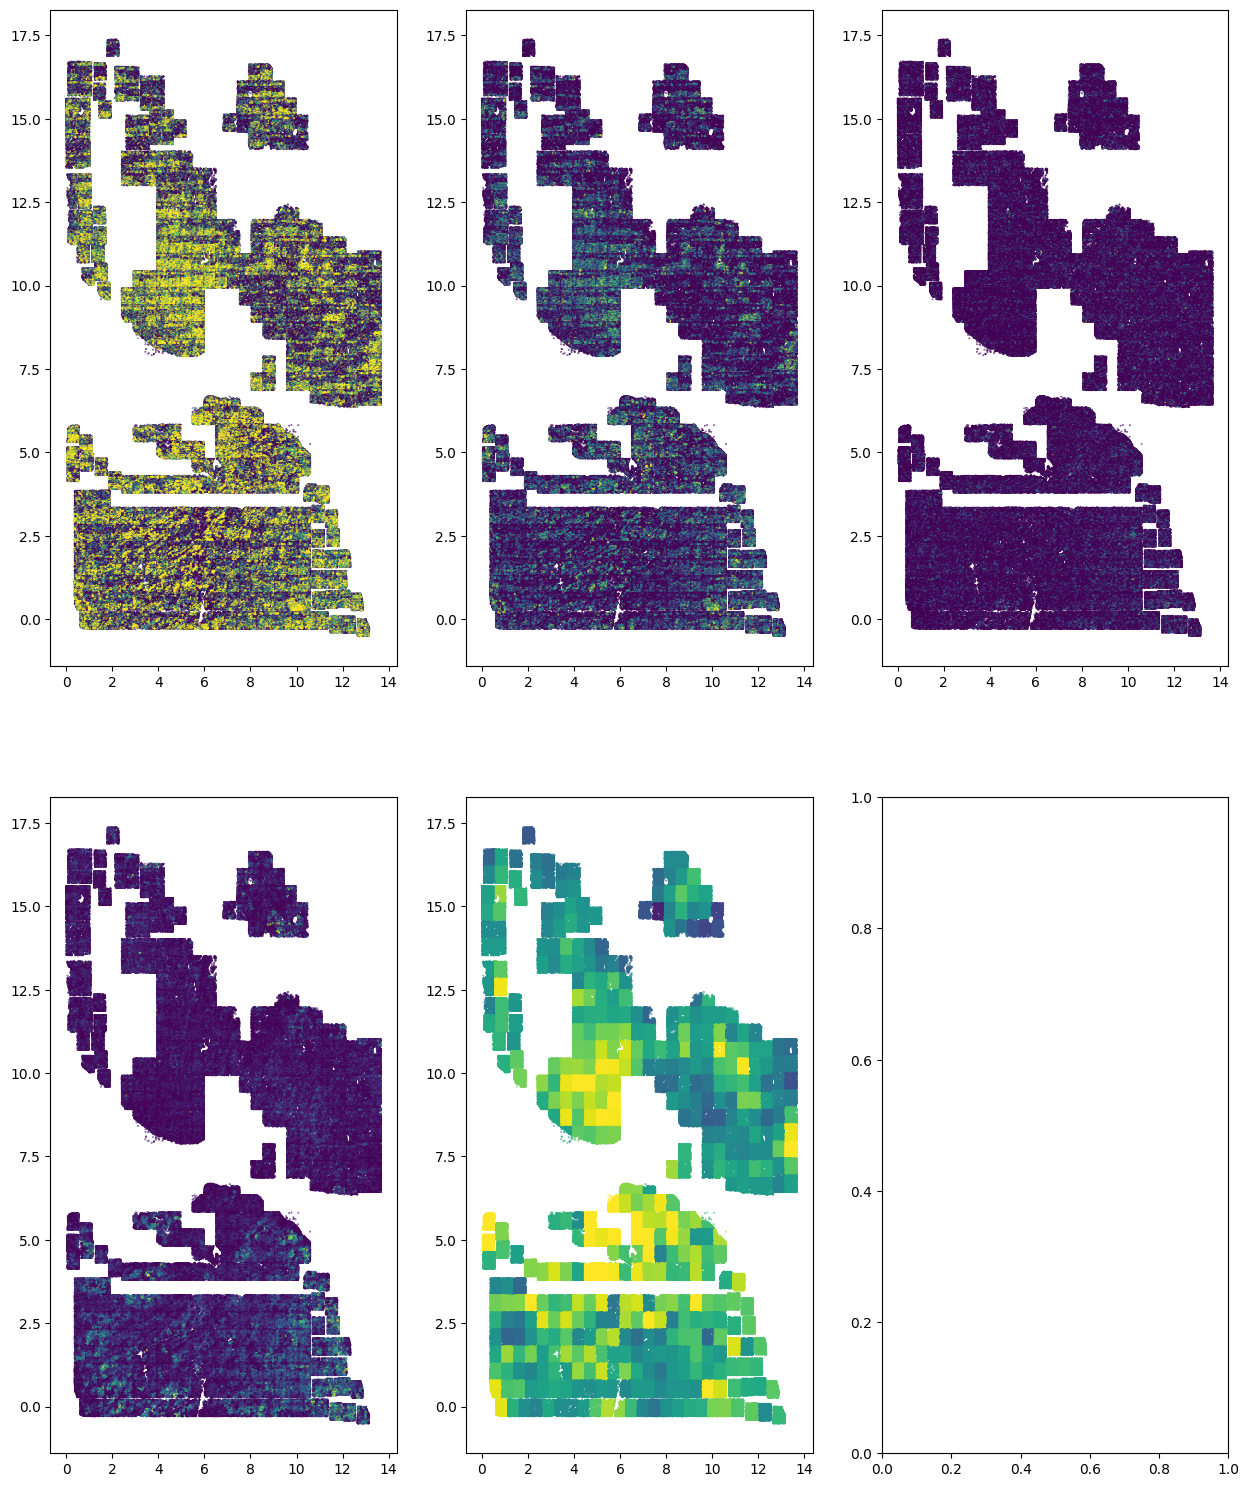

In [5]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15.2, 18.75))

axes[0,0].scatter(adata.obs["x_slide_mm"], adata.obs["y_slide_mm"], c=(adata.obs['nCount_RNA']),vmax = 200,vmin = 60, s = 0.1)
axes[0,1].scatter(adata.obs["x_slide_mm"], adata.obs["y_slide_mm"], c=(adata.obs['nFeature_RNA']),vmax = 200,vmin = 60, s = 0.1)
axes[0,2].scatter(adata.obs["x_slide_mm"], adata.obs["y_slide_mm"], c=(adata.obs['nCount_negprobes']),vmax = 5,vmin = 0, s = 0.1)
axes[1,0].scatter(adata.obs["x_slide_mm"], adata.obs["y_slide_mm"], c=(adata.obs['nCount_falsecode']),vmax = 40,vmin = 0, s = 0.1)
axes[1,1].scatter(adata.obs["x_slide_mm"], adata.obs["y_slide_mm"], c=(adata.obs['meanCounts_perFOV']),vmax = 200,vmin = 60, s = 0.1)

plt.show()

# Create histograms of QC metrics for the slide

In [6]:
fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(30, 5))
axes[0].hist(adata.obs["nCount_RNA"], bins = np.arange(0, 1000, 50))
axes[0].axvline(np.mean(adata.obs["nCount_RNA"]), color='black', linestyle='dashed', linewidth=1)
axes[1].hist(adata.obs["nFeature_RNA"], bins = np.arange(0, 400, 10))
axes[1].axvline(np.mean(adata.obs["nFeature_RNA"]), color='black', linestyle='dashed', linewidth=1)
axes[2].hist(adata.obs["nCount_falsecode"], bins = np.arange(0, 120, 2))
axes[2].axvline(np.mean(adata.obs["nCount_falsecode"]), color='black', linestyle='dashed', linewidth=1)
axes[3].hist(adata.obs["nCount_negprobes"], bins = np.arange(0, 20, 0.5))
axes[3].axvline(np.mean(adata.obs["nCount_negprobes"]), color='black', linestyle='dashed', linewidth=1)
axes[4].hist(adata.obs["meanCounts_perFOV"], bins = np.arange(50, 250, 10))
axes[4].axvline(np.mean(adata.obs["meanCounts_perFOV"]), color='black', linestyle='dashed', linewidth=1)

plt.show()

### parsed by sample

In [7]:
adata_sample = adata[adata.obs["sample"] == "HK2844"]

fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(30, 5))
axes[0].hist(adata_sample.obs["nCount_RNA"], bins = np.arange(0, 1000, 50))
axes[0].axvline(np.mean(adata_sample.obs["nCount_RNA"]), color='black', linestyle='dashed', linewidth=1)
axes[1].hist(adata_sample.obs["nFeature_RNA"], bins = np.arange(0, 400, 10))
axes[1].axvline(np.mean(adata_sample.obs["nFeature_RNA"]), color='black', linestyle='dashed', linewidth=1)
axes[2].hist(adata_sample.obs["nCount_falsecode"], bins = np.arange(0, 120, 2))
axes[2].axvline(np.mean(adata_sample.obs["nCount_falsecode"]), color='black', linestyle='dashed', linewidth=1)
axes[3].hist(adata_sample.obs["nCount_negprobes"], bins = np.arange(0, 20, 0.5))
axes[3].axvline(np.mean(adata_sample.obs["nCount_negprobes"]), color='black', linestyle='dashed', linewidth=1)
axes[4].hist(adata_sample.obs["meanCounts_perFOV"], bins = np.arange(50, 250, 10))
axes[4].axvline(np.mean(adata_sample.obs["meanCounts_perFOV"]), color='black', linestyle='dashed', linewidth=1)

plt.show()

In [8]:
adata_sample = adata[adata.obs["sample"] == "HK3039"]

fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(30, 5))
axes[0].hist(adata_sample.obs["nCount_RNA"], bins = np.arange(0, 1000, 50))
axes[0].axvline(np.mean(adata_sample.obs["nCount_RNA"]), color='black', linestyle='dashed', linewidth=1)
axes[1].hist(adata_sample.obs["nFeature_RNA"], bins = np.arange(0, 400, 10))
axes[1].axvline(np.mean(adata_sample.obs["nFeature_RNA"]), color='black', linestyle='dashed', linewidth=1)
axes[2].hist(adata_sample.obs["nCount_falsecode"], bins = np.arange(0, 120, 2))
axes[2].axvline(np.mean(adata_sample.obs["nCount_falsecode"]), color='black', linestyle='dashed', linewidth=1)
axes[3].hist(adata_sample.obs["nCount_negprobes"], bins = np.arange(0, 20, 0.5))
axes[3].axvline(np.mean(adata_sample.obs["nCount_negprobes"]), color='black', linestyle='dashed', linewidth=1)
axes[4].hist(adata_sample.obs["meanCounts_perFOV"], bins = np.arange(50, 250, 10))
axes[4].axvline(np.mean(adata_sample.obs["meanCounts_perFOV"]), color='black', linestyle='dashed', linewidth=1)

plt.show()

# Examine the QC metrics for reads and export as csv

In [9]:
df_reads = pd.DataFrame(columns=['number_of_probes','total_reads', 'reads_per_cell','reads_per_gene', 'reads_per_cell_in_FOV>100', 'reads_per_cell_in_FOV<100'])

probe_all = (adata.var.index).tolist()
probe_origin_spike = (adata.var.index[adata.var["custom_probes"] == True]).tolist()
probe_origin_orig = (adata.var.index[adata.var["orig_probes"] == True]).tolist()
probe_origin_green3 = (adata.var.index[adata.var["green_counts"] == 3]).tolist()
probe_origin_green2 = (adata.var.index[adata.var["green_counts"] == 2]).tolist()
probe_origin_green1 = (adata.var.index[adata.var["green_counts"] == 1]).tolist()
probe_origin_green0 = (adata.var.index[adata.var["green_counts"] == 0]).tolist()
probe_origin_blue3 = (adata.var.index[adata.var["blue_counts"] == 3]).tolist()
probe_origin_blue2 = (adata.var.index[adata.var["blue_counts"] == 2]).tolist()
probe_origin_blue1 = (adata.var.index[adata.var["blue_counts"] == 1]).tolist()
probe_origin_blue0 = (adata.var.index[adata.var["blue_counts"] == 0]).tolist()
probe_origin_red3 = (adata.var.index[adata.var["red_counts"] == 3]).tolist()
probe_origin_red2 = (adata.var.index[adata.var["red_counts"] == 2]).tolist()
probe_origin_red1 = (adata.var.index[adata.var["red_counts"] == 1]).tolist()
probe_origin_red0 = (adata.var.index[adata.var["red_counts"] == 0]).tolist()
probe_origin_yellow3 = (adata.var.index[adata.var["yellow_counts"] == 3]).tolist()
probe_origin_yellow2 = (adata.var.index[adata.var["yellow_counts"] == 2]).tolist()
probe_origin_yellow1 = (adata.var.index[adata.var["yellow_counts"] == 1]).tolist()
probe_origin_yellow0 = (adata.var.index[adata.var["yellow_counts"] == 0]).tolist()

probe_subset = [probe_all, probe_origin_orig, probe_origin_spike, probe_origin_green3, probe_origin_green2,
                probe_origin_green1, probe_origin_green0, probe_origin_blue3, probe_origin_blue2, probe_origin_blue1,
                probe_origin_blue0, probe_origin_red3, probe_origin_red2, probe_origin_red1, probe_origin_red0,
                probe_origin_yellow3, probe_origin_yellow2, probe_origin_yellow1, probe_origin_yellow0]

nCells = len(adata.obs["nCount_RNA"])

reads_per_cell_per_gene = []

df = pd.DataFrame(columns=adata.obs["cellType_CosMx_1"].unique(), index=range(len(probe_subset)))
    
for probe_set, i in enumerate(probe_subset):
    nCells = len(adata.obs["nCount_RNA"])
    reads_per_gene = adata[:,i].X.sum(axis=0).tolist()
    reads_per_gene = [item for sublist in reads_per_gene for item in sublist]
    gene_len = len(reads_per_gene)
    reads_per_gene = np.sum(reads_per_gene)
    reads_per_cell_per_gene.append(reads_per_gene/nCells/gene_len)
    for cell_group, j in enumerate(adata.obs["cellType_CosMx_1"].unique()):
        k = adata[adata.obs["cellType_CosMx_1"] == j].obs.index
        nCells = len(adata[adata.obs["cellType_CosMx_1"] == j].obs.index)
        reads_per_gene = adata[k,i].X.sum(axis=0).tolist()
        reads_per_gene = [item for sublist in reads_per_gene for item in sublist]
        gene_len = len(reads_per_gene)
        reads_per_gene = np.sum(reads_per_gene)
        df.iloc[probe_set,cell_group] = reads_per_gene/gene_len/nCells

df.index = ["all_probes","orig_panel", "custom", "green3", "green2",
                "green1", "green0", "blue3", "blue2", "blue1",
                "blue0", "red3", "red2", "red1", "red0",
                "yellow3", "yellow2", "yellow1", "yellow0"]

df["all_cells"] = reads_per_cell_per_gene

df.to_csv('/home/levinsj/spatial/QC_metric_output/slide0_postFilterQC_reads_per_gene_per_count.csv', index=True)


## Plot reads per cell per gene for Original and Custom panels

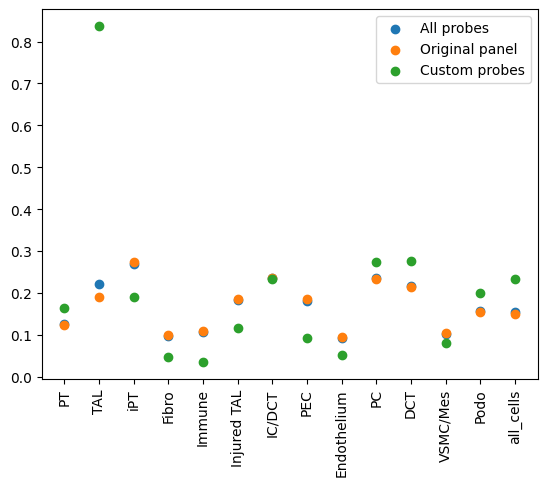

In [10]:
# Create a scatter plot

color = ["tab:blue", "tab:orange", "tab:green"]

fig, ax = plt.subplots()
for i, panel in enumerate(['All probes', 'Original panel', 'Custom probes']):
    ax.scatter(df.columns, df.iloc[i], c=color[i], label= panel)

ax.legend()


plt.xticks(rotation=90)
plt.show()

 ## Plot reads per cell per gene for different amounts of green in barcode

In [11]:
color = ['tab:pink','tab:gray','tab:olive','tab:cyan']

fig, ax = plt.subplots()
for i, panel in enumerate(['green3', 'green2', 'green1', "green0"]):
    ax.scatter(df.columns, df.iloc[i+3], c=color[i], label= panel)

ax.legend()


plt.xticks(rotation=90)
plt.show()

# Examine the QC metrics for cells and export as csv

In [12]:
df_cells = pd.DataFrame(columns=['nCount_RNA', 'nFeature_RNA', 'nFOVs_total'])

adata_subset_FOVhigh = adata[adata.obs["meanCounts_perFOV"] >= 100]
adata_subset_FOVlow = adata[adata.obs["meanCounts_perFOV"] < 100]
adata_sample_0 = adata[adata.obs["sample"] == "HK3039"]
adata_sample_1 = adata[adata.obs["sample"] == "HK2844"]

df_cells['nCount_RNA'] = [np.mean(adata.obs["nCount_RNA"]), np.mean(adata_subset_FOVhigh.obs["nCount_RNA"]), np.mean(adata_subset_FOVlow.obs["nCount_RNA"]),  np.mean(adata_sample_0.obs["nCount_RNA"]),  np.mean(adata_sample_1.obs["nCount_RNA"])]
df_cells['nFeature_RNA'] = [np.mean(adata.obs["nFeature_RNA"]), np.mean(adata_subset_FOVhigh.obs["nFeature_RNA"]), np.mean(adata_subset_FOVlow.obs["nFeature_RNA"]), np.mean(adata_sample_0.obs["nFeature_RNA"]), np.mean(adata_sample_1.obs["nFeature_RNA"])]
df_cells['nFOVs_total'] = [len(adata.obs["fov"].unique()), len(adata_subset_FOVhigh.obs["fov"].unique()), len(adata_subset_FOVlow.obs["fov"].unique()), len(adata_sample_0.obs["fov"].unique()), len(adata_sample_1.obs["fov"].unique())]
df_cells["nCount_negprobes"] = [np.mean(adata.obs["nCount_negprobes"]), np.mean(adata_subset_FOVhigh.obs["nCount_negprobes"]), np.mean(adata_subset_FOVlow.obs["nCount_negprobes"]), np.mean(adata_sample_0.obs["nCount_negprobes"]), np.mean(adata_sample_1.obs["nCount_negprobes"])]
df_cells["nCount_falsecode"] = [np.mean(adata.obs["nCount_falsecode"]), np.mean(adata_subset_FOVhigh.obs["nCount_falsecode"]), np.mean(adata_subset_FOVlow.obs["nCount_negprobes"]), np.mean(adata_sample_0.obs["nCount_negprobes"]), np.mean(adata_sample_1.obs["nCount_negprobes"])]
df_cells["meanCounts_perFOV"] = [np.mean(adata.obs["meanCounts_perFOV"]), np.mean(adata_subset_FOVhigh.obs["meanCounts_perFOV"]), np.mean(adata_subset_FOVlow.obs["meanCounts_perFOV"]), np.mean(adata_sample_0.obs["meanCounts_perFOV"]), np.mean(adata_sample_1.obs["meanCounts_perFOV"])]

df_cells.index = ["all Cells", "FOV_nCount>100", "FOV_nCount<100", "HK3039", "HK2844"]

print(df_cells)

df_cells.to_csv('/home/levinsj/spatial/QC_metric_output/slide0_postFilterQC_cells.csv', index=False)

                nCount_RNA  nFeature_RNA  nFOVs_total  nCount_negprobes  \
all Cells       154.368134     77.545917          483          0.258175   
FOV_nCount>100  155.073628     77.758298          475          0.258123   
FOV_nCount<100   92.069704     58.791687            8          0.262830   
HK3039          161.562207     77.856481          227          0.260015   
HK2844          146.946930     77.225549          256          0.256277   

                nCount_falsecode  meanCounts_perFOV  
all Cells               3.499133         154.368134  
FOV_nCount>100          3.480009         155.073628  
FOV_nCount<100          0.262830          92.069704  
HK3039                  0.260015         161.562207  
HK2844                  0.256277         146.946930  


# Examine how the add-on panel affects ability to cluster
## Look at clustering based on just the original panel, and how this handels our previous annotations

/usr/local/lib/python3.8/dist-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


/usr/local/lib/python3.8/dist-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/usr/local/lib/python3.8/dist-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/usr/local/lib/python3.8/dist-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/usr/local/lib/python3.8/dist-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/usr/local/lib/python3.8/dist-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/usr/local/lib/python3.8/dist-packages/scanpy/plot

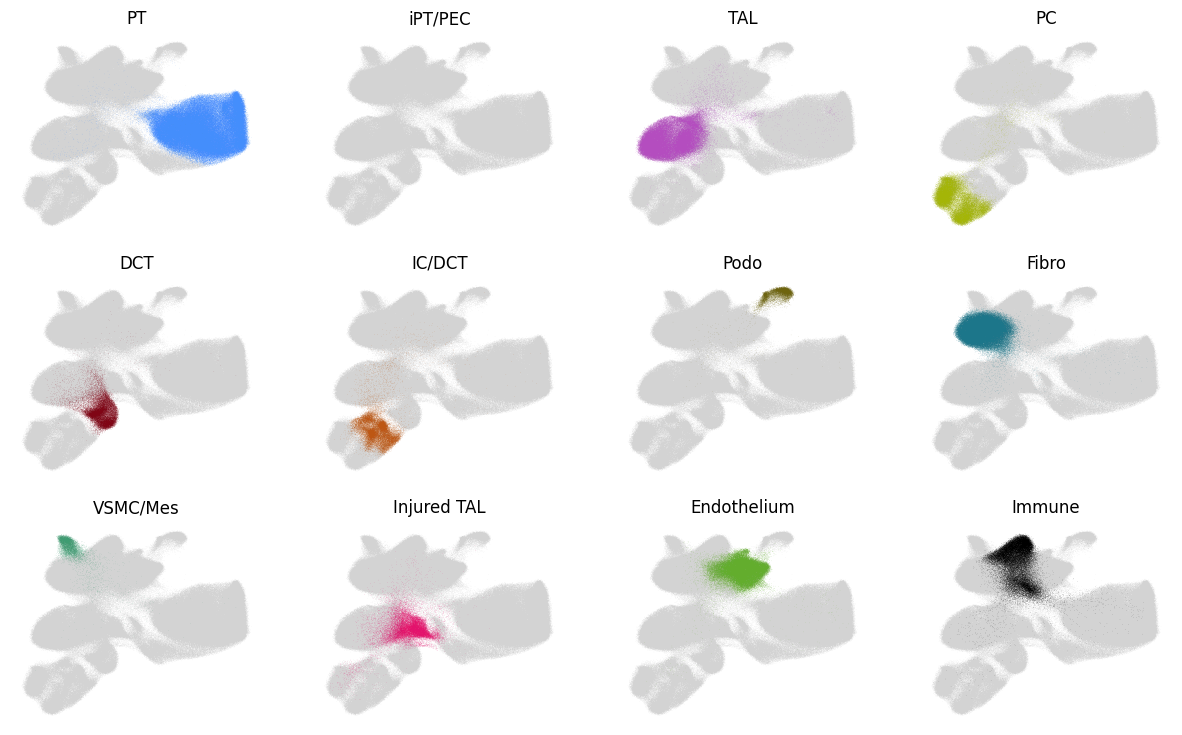

In [13]:
adata_orig = adata[:,probe_origin_orig]
sc.pp.normalize_total(adata, inplace=True)
sc.pp.log1p(adata)
sc.pp.pca(adata_orig)
sc.pp.neighbors(adata_orig, n_neighbors = 15)
sc.tl.umap(adata_orig)
sc.tl.leiden(adata_orig)

sc.pl.umap(adata_orig, color = "cellType_CosMx_1", frameon = False)


fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(15, 9))

sc.pl.umap(adata_orig, color = "cellType_CosMx_1", groups = "PT",frameon = False, legend_loc = False, title = "PT", show = False, ax = axes[0,0])
sc.pl.umap(adata_orig, color = "cellType_CosMx_1", groups = "iPT/PEC",frameon = False, legend_loc = False, title = "iPT/PEC", show = False, ax = axes[0,1])
sc.pl.umap(adata_orig, color = "cellType_CosMx_1", groups = "TAL",frameon = False, legend_loc = False, title = "TAL", show = False, ax = axes[0,2])
sc.pl.umap(adata_orig, color = "cellType_CosMx_1", groups = "PC",frameon = False, legend_loc = False, title = "PC", show = False, ax = axes[0,3])
sc.pl.umap(adata_orig, color = "cellType_CosMx_1", groups = "DCT",frameon = False, legend_loc = False, title = "DCT", show = False, ax = axes[1,0])
sc.pl.umap(adata_orig, color = "cellType_CosMx_1", groups = "IC/DCT",frameon = False, legend_loc = False, title = "IC/DCT", show = False, ax = axes[1,1])
sc.pl.umap(adata_orig, color = "cellType_CosMx_1", groups = "Podo",frameon = False, legend_loc = False, title = "Podo", show = False, ax = axes[1,2])
sc.pl.umap(adata_orig, color = "cellType_CosMx_1", groups = "Fibro",frameon = False, legend_loc = False, title = "Fibro", show = False, ax = axes[1,3])
sc.pl.umap(adata_orig, color = "cellType_CosMx_1", groups = "VSMC/Mes",frameon = False, legend_loc = False, title = "VSMC/Mes", show = False, ax = axes[2,0])
sc.pl.umap(adata_orig, color = "cellType_CosMx_1", groups = "Injured TAL",frameon = False, legend_loc = False, title = "Injured TAL", show = False, ax = axes[2,1])
sc.pl.umap(adata_orig, color = "cellType_CosMx_1", groups = "Endothelium",frameon = False, legend_loc = False, title = "Endothelium", show = False, ax = axes[2,2])
sc.pl.umap(adata_orig, color = "cellType_CosMx_1", groups = "Immune",frameon = False, legend_loc = False, title = "Immune", show = False, ax = axes[2,3])
plt.axis('off')
plt.show()



In [14]:
sc.pl.umap(adata_orig, color = "leiden", frameon = False, legend_loc = 'on data', legend_fontsize=10, legend_fontoutline=2)

/usr/local/lib/python3.8/dist-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


## Look at clustering based on just the cosmx panel, and how this handels our previous annotations

/usr/local/lib/python3.8/dist-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


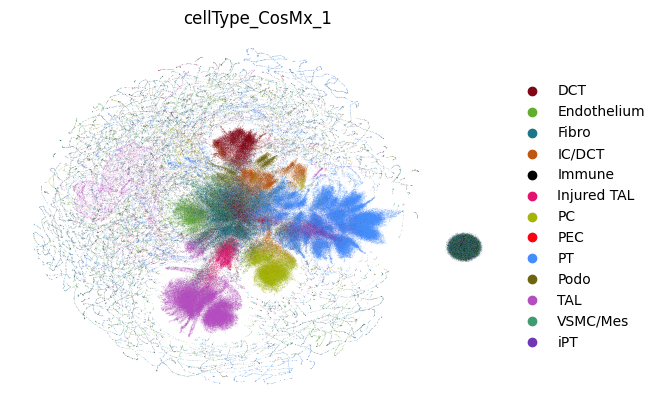

/usr/local/lib/python3.8/dist-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/usr/local/lib/python3.8/dist-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/usr/local/lib/python3.8/dist-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/usr/local/lib/python3.8/dist-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/usr/local/lib/python3.8/dist-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/usr/local/lib/python3.8/dist-packages/scanpy/plot

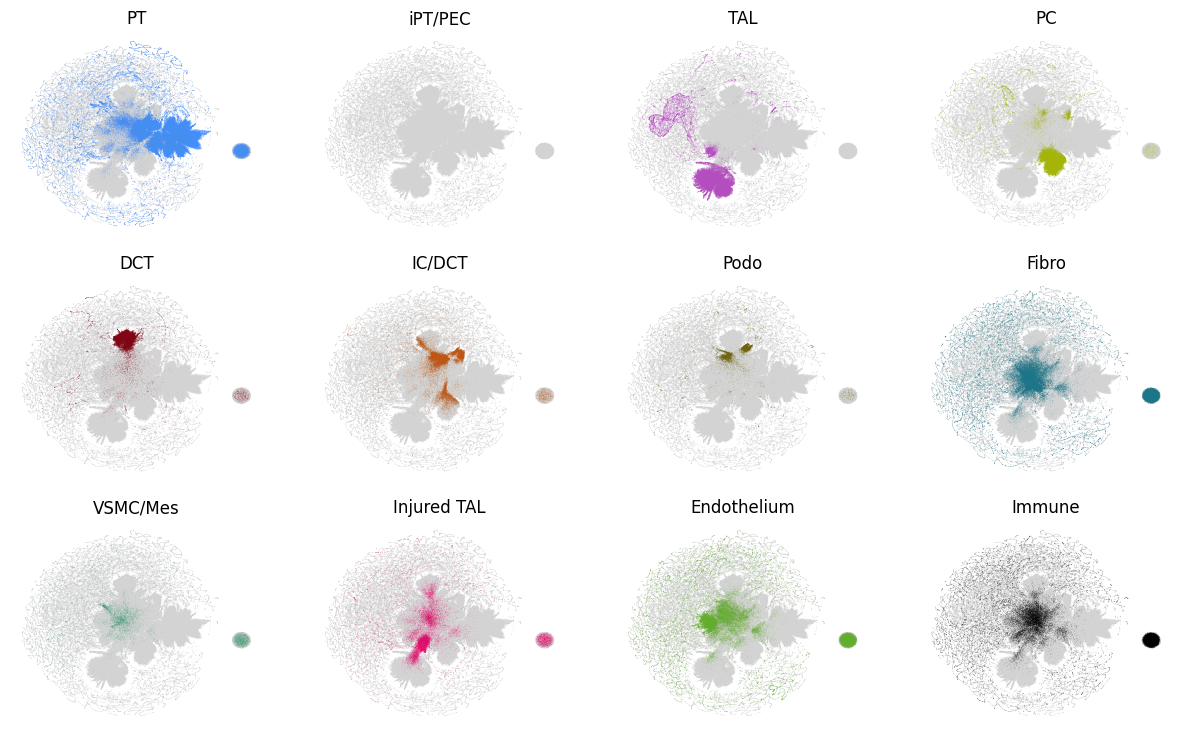

In [15]:
adata_spike = adata[:,probe_origin_spike]

sc.pp.normalize_total(adata, inplace=True)
sc.pp.log1p(adata)
sc.pp.pca(adata_spike)
sc.pp.neighbors(adata_spike, n_neighbors = 15)
sc.tl.umap(adata_spike)

sc.pl.umap(adata_spike, color = "cellType_CosMx_1", frameon = False)

fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(15, 9))

sc.pl.umap(adata_spike, color = "cellType_CosMx_1", groups = "PT",frameon = False, legend_loc = False, title = "PT", show = False, ax = axes[0,0])
sc.pl.umap(adata_spike, color = "cellType_CosMx_1", groups = "iPT/PEC",frameon = False, legend_loc = False, title = "iPT/PEC", show = False, ax = axes[0,1])
sc.pl.umap(adata_spike, color = "cellType_CosMx_1", groups = "TAL",frameon = False, legend_loc = False, title = "TAL", show = False, ax = axes[0,2])
sc.pl.umap(adata_spike, color = "cellType_CosMx_1", groups = "PC",frameon = False, legend_loc = False, title = "PC", show = False, ax = axes[0,3])
sc.pl.umap(adata_spike, color = "cellType_CosMx_1", groups = "DCT",frameon = False, legend_loc = False, title = "DCT", show = False, ax = axes[1,0])
sc.pl.umap(adata_spike, color = "cellType_CosMx_1", groups = "IC/DCT",frameon = False, legend_loc = False, title = "IC/DCT", show = False, ax = axes[1,1])
sc.pl.umap(adata_spike, color = "cellType_CosMx_1", groups = "Podo",frameon = False, legend_loc = False, title = "Podo", show = False, ax = axes[1,2])
sc.pl.umap(adata_spike, color = "cellType_CosMx_1", groups = "Fibro",frameon = False, legend_loc = False, title = "Fibro", show = False, ax = axes[1,3])
sc.pl.umap(adata_spike, color = "cellType_CosMx_1", groups = "VSMC/Mes",frameon = False, legend_loc = False, title = "VSMC/Mes", show = False, ax = axes[2,0])
sc.pl.umap(adata_spike, color = "cellType_CosMx_1", groups = "Injured TAL",frameon = False, legend_loc = False, title = "Injured TAL", show = False, ax = axes[2,1])
sc.pl.umap(adata_spike, color = "cellType_CosMx_1", groups = "Endothelium",frameon = False, legend_loc = False, title = "Endothelium", show = False, ax = axes[2,2])
sc.pl.umap(adata_spike, color = "cellType_CosMx_1", groups = "Immune",frameon = False, legend_loc = False, title = "Immune", show = False, ax = axes[2,3])
plt.axis('off')
plt.show()


/usr/local/lib/python3.8/dist-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


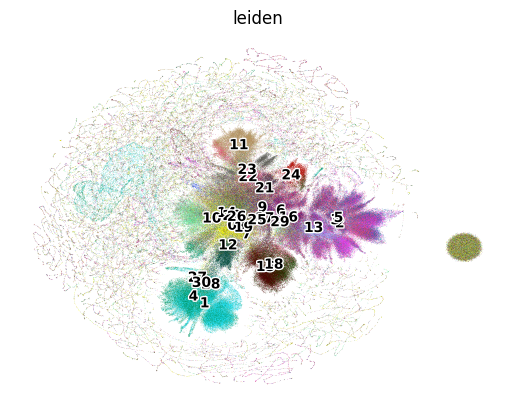

In [16]:
sc.pl.umap(adata_spike, color = "leiden", frameon = False, legend_loc = 'on data', legend_fontsize=10, legend_fontoutline=2)